# **Superstore Analysis**

## **Background**

This simple dataset gives insights on online orders of a US superstore from 2015-2017.

## **Data Description**

There are total 21 variables in our dataset: 
- 'Row ID' - This is nothing but Serial No. 
- 'Order ID' - ID created when a product order is placed. 
- 'Order Date' - Date on which a customer places his/her order. 
- 'Ship Date' - Date on which the order is shipped. 
- 'Ship Mode' - Mode of shipment of each order. 
- 'Customer ID' - ID assigned to each customer who places an order. 
- 'Customer Name' - Name of Customer. 
- 'Segment' - Section from where the order is placed. 
- 'Country' - Country details of this data set. We are looking only for US store data. 
- 'City' - Cities of US are listed here. 
- 'State' - States of US are listed here. 
- 'Postal Code' - pin code
- 'Region' - grouped into region wise 
- 'Product ID' - Product ID of each product 
- 'Category' - Category to which each product belongs to. 
- 'Sub-Category' - Sub-Category of each Category 
- 'Product Name' - Name of products. 
- 'Sales' - total selling Price of each product order. 
- 'Quantity' - number of quantity available for a particular product order. 
- 'Discount' - Discount available on each product order. 
- 'Profit' - Profit gained on each product order.


# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Read Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Digital Skola/Dataset/US Superstore data.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#df = pd.read_excel('US Superstore data.xlsx')
#df

Ada 9994 entri dan 21 fitur

## **Data Transformation and Cleaning**

In [ ]:
#Check shape of data
df.shape

(9994, 21)

In [ ]:
# Check datatype of column / fitur / attribute
pd.DataFrame(df.dtypes, columns = ["Data Type"])

,Data Type
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


Int64 dan Float64 merupakan numerical data
Object dan datetime64 merupakan categorical data

Untuk "Postal Code" terdeteksi merupakan numerical padahal sebenarnya dia merupakan categorical.

In [ ]:
# Check if dataset is null or not
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
# Check details of data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df = df.drop('Row ID',axis=1)
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
# Order ID become index
df.set_index('Order ID', inplace = True)
df

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order ID,,,,,,,,,,,,,,,,,,,
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


## **Descriptive Data Analysis**

Numerical Data

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


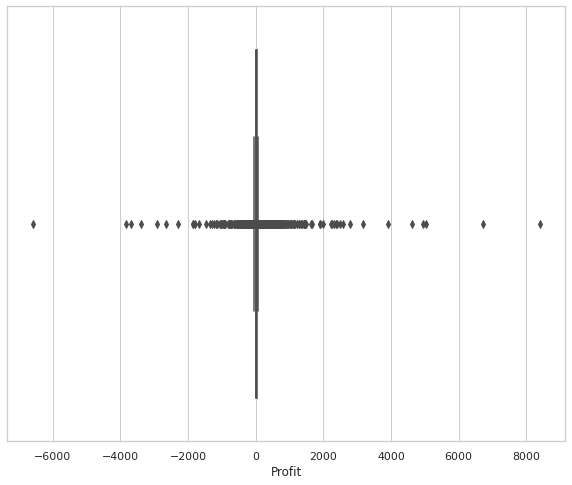

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ProfitPlot = sns.boxplot(x='Profit', data=df, orient="v")

In [ ]:
Q25 = np.quantile(df['Profit'],q=0.25)
Q75 = np.quantile(df['Profit'],q=0.75)
IQR = Q75 - Q25
cutoff = IQR * 1.5

print("Number of Profit Lower Outliers: " , df[df['Profit'] <= (Q25 - cutoff)]['Profit'].count())
print("Number of Profit Upper Outliers: " , df[df['Profit'] >= (Q75 + cutoff)]['Profit'].count())

Number of Profit Lower Outliers:  604
Number of Profit Upper Outliers:  1277


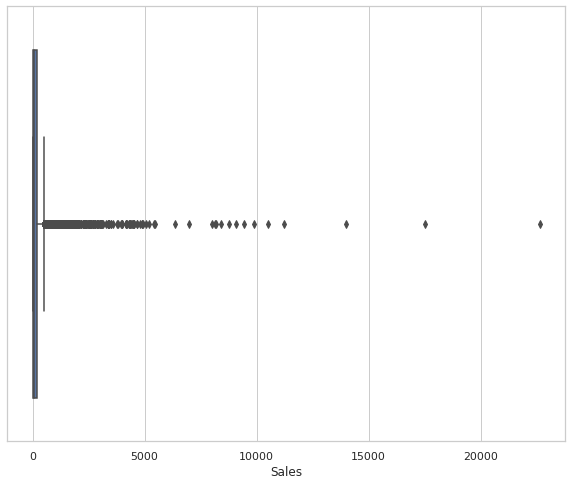

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
SalesPlot = sns.boxplot(x='Sales', data=df, orient="v")

Setelah cek boxplot, terlihat banyak outlier di dalam dataset. Ini terjadi karena dari datanya banyak 0 pada column Sales dan Profit. Sehingga, diatas 0 terlihat seperti outlier

In [ ]:
Q25 = np.quantile(df['Sales'],q=0.25)
Q75 = np.quantile(df['Sales'],q=0.75)
IQR = Q75 - Q25
cutoff = IQR * 1.5

print("Number of Sales Lower Outliers: " , df[df['Sales'] <= (Q25 - cutoff)]['Sales'].count())
print("Number of Sales Upper Outliers: " , df[df['Sales'] >= (Q75 + cutoff)]['Sales'].count())

Number of Sales Lower Outliers:  0
Number of Sales Upper Outliers:  1167


**Data Visualization Numerical**

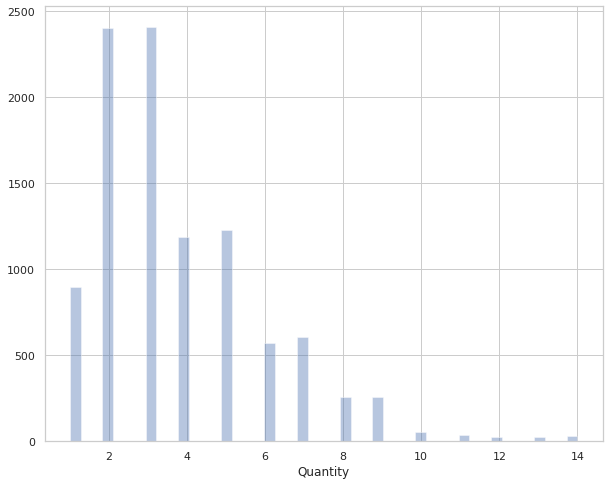

In [ ]:
plt.figure(figsize=(10,8))
QtyPlot = sns.distplot(df['Quantity'], kde=False)

Frekuensi distribusi dari Quantity ini skewed karena banyak customer lebih memilih untuk membeli produk sebanyak 2-5 dan hanya beberapa yang membeli lebih dari 8 produk.

Categorical Data

In [ ]:
df.describe(include=['object'])

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,793,793,3,1,531,49,4,1862,3,17,1850
top,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


Karena column "Country" hanya memiliki 1 unique value. Maka tidak perlu analisis lebih lanjut.

In [ ]:
# Category, sub-category and Product Name
type_counts = df['Category'].value_counts()
type_counts1 = df['Sub-Category'].value_counts()
print(type_counts,'\n')
print(type_counts1)

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64 

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


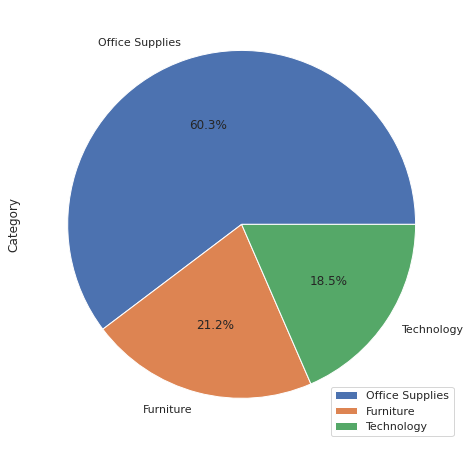

In [ ]:
df2 = pd.DataFrame({'Category': type_counts}, index = ['Office Supplies', 'Furniture', 'Technology'])
df2.plot.pie(y='Category', figsize=(8,8), autopct='%1.1f%%')



*   Most item ordered are office supplies
*   Least item ordered are Technology



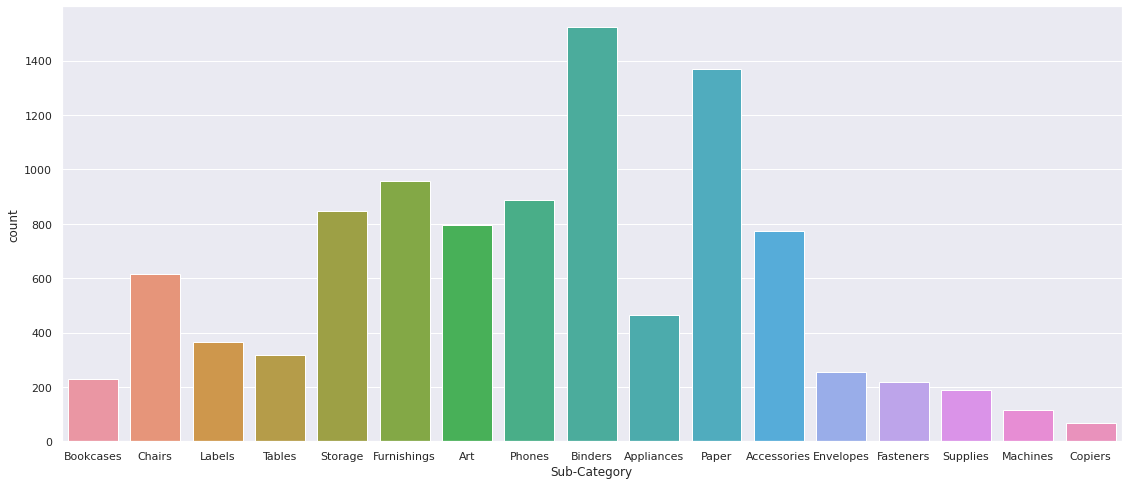

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(19,8))
ax = sns.countplot(x = 'Sub-Category', data=df)



*   Most item purchased are Binders and Papers



<function matplotlib.pyplot.show>

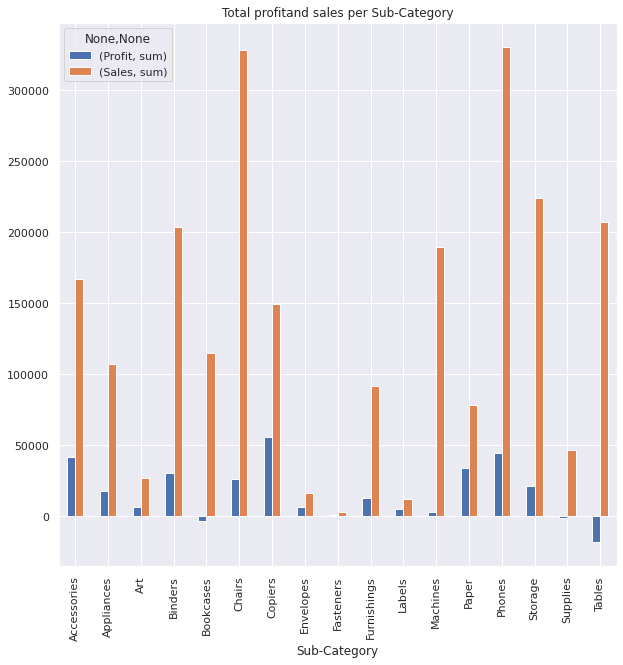

In [ ]:
# Check total profit and Sales per sub-category
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,10))
plt.title('Total profitand sales per Sub-Category')
plt.show



*   Profit tertinggi didapat dari Copier, dan harga sales tertinggi didapat dari kursi dan telepon
*   Dari data terlihat bahwa penjualan Meja(Tables) dan Rak buku(Bookcases) tidak mengalami keuntungan.



In [ ]:
# Number of products available in store
df['Product Name'].nunique()

1850

In [ ]:
df['Product Name'].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

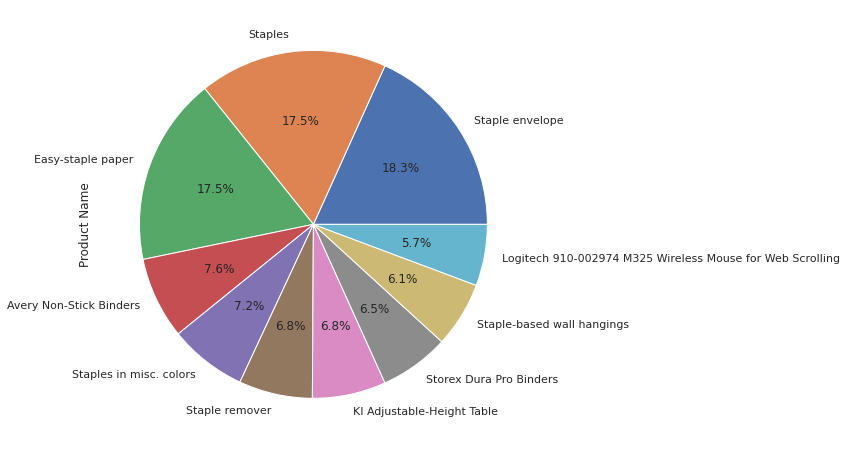

In [ ]:
plt.figure(figsize=(10,8))
df['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

In [ ]:
# Sales by Region
df_central = df[df['Region'] == 'Central']
df_east = df[df['Region'] == 'East']
df_south = df[df['Region'] == 'South']
df_west = df[df['Region'] == 'West']

**Central Region**

<function matplotlib.pyplot.show>

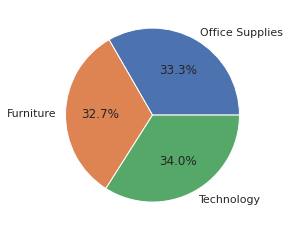

In [ ]:
central_category_sales = pd.DataFrame(df_central.groupby('Category')['Sales'].sum())['Sales']

plt_central = pd.DataFrame({'Sales by Category ' : central_category_sales}, index=['Office Supplies', 'Furniture', 'Technology'])
plt.pie(plt_central, labels=plt_central.index, autopct='%1.1f%%')
plt.show

**East Region**

<function matplotlib.pyplot.show>

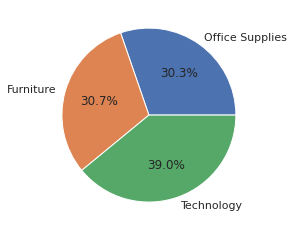

In [ ]:
east_category_sales = pd.DataFrame(df_east.groupby('Category')['Sales'].sum())['Sales']

plt_east = pd.DataFrame({'Sales by Category ' : east_category_sales}, index=['Office Supplies', 'Furniture', 'Technology'])
plt.pie(plt_east, labels=plt_east.index, autopct='%1.1f%%')
plt.show

**West**

<function matplotlib.pyplot.show>

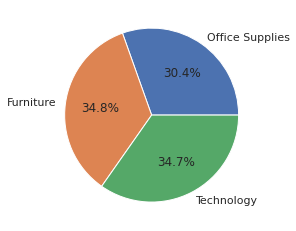

In [ ]:
west_category_sales = pd.DataFrame(df_west.groupby('Category')['Sales'].sum())['Sales']

plt_west = pd.DataFrame({'Sales by Category ' : west_category_sales}, index=['Office Supplies', 'Furniture', 'Technology'])
plt.pie(plt_west, labels=plt_west.index, autopct='%1.1f%%')
plt.show

**South**

<function matplotlib.pyplot.show>

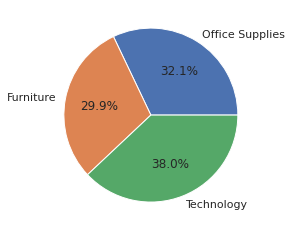

In [ ]:
south_category_sales = pd.DataFrame(df_south.groupby('Category')['Sales'].sum())['Sales']

plt_south = pd.DataFrame({'Sales by Category ' : south_category_sales}, index=['Office Supplies', 'Furniture', 'Technology'])
plt.pie(plt_south, labels=plt_south.index, autopct='%1.1f%%')
plt.show

## **Clustering**


In [ ]:
# Subset data
df_imp = df[['Ship Mode','Quantity','Sales','Profit','Sub-Category','Category','Region']].copy()
df_imp.head()

,Ship Mode,Quantity,Sales,Profit,Sub-Category,Category,Region
Order ID,,,,,,,
CA-2016-152156,Second Class,2,261.9600,41.9136,Bookcases,Furniture,South
CA-2016-152156,Second Class,3,731.9400,219.5820,Chairs,Furniture,South
CA-2016-138688,Second Class,2,14.6200,6.8714,Labels,Office Supplies,West
US-2015-108966,Standard Class,5,957.5775,-383.0310,Tables,Furniture,South
US-2015-108966,Standard Class,2,22.3680,2.5164,Storage,Office Supplies,South


In [ ]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_imp['Ship Mode'] = le.fit_transform(df_imp['Ship Mode'])
df_imp['Sub-Category'] = le.fit_transform(df_imp['Sub-Category'])
df_imp['Category'] = le.fit_transform(df_imp['Category'])
df_imp['Region'] = le.fit_transform(df_imp['Region'])
df_imp.head()

,Ship Mode,Quantity,Sales,Profit,Sub-Category,Category,Region
Order ID,,,,,,,
CA-2016-152156,2,2,261.9600,41.9136,4,0,2
CA-2016-152156,2,3,731.9400,219.5820,5,0,2
CA-2016-138688,2,2,14.6200,6.8714,10,1,3
US-2015-108966,3,5,957.5775,-383.0310,16,0,2
US-2015-108966,3,2,22.3680,2.5164,14,1,2


**K-Mean**

In [ ]:
# /K-Means Function
def kmean(df,k):
  kmean = KMeans(n_clusters=k)
  kmean.fit(df)
  kmean.fit_predict(df)
  labels_kmean = kmean.labels_
  return labels_kmean

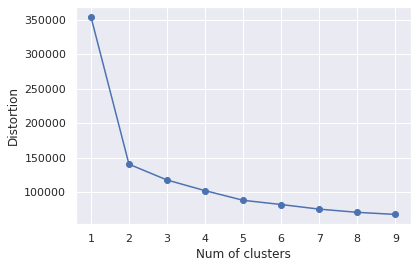

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

std = StandardScaler()
min_max = MinMaxScaler()
RS = RobustScaler()

# Dataframe utk standard scaler
df_std = df_imp.copy()
df_std[['Sales','Profit']] = std.fit_transform(df_std[['Sales','Profit']])

# Elbow Method
k = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, max_iter = 100)
  kmeans.fit(df_std[['Ship Mode','Quantity','Sales','Profit','Sub-Category','Category','Region']])
  k.append(kmeans.inertia_)

plt.plot(range(1,10),k, marker='o')
plt.xlabel("Num of clusters")
plt.ylabel("Distortion")
plt.show()

In [ ]:
df_std_pred = pd.DataFrame(kmean(df_std,2), index=df_std.index,columns=['Cluster'])
df_std_pred

,Cluster
Order ID,
CA-2016-152156,0
CA-2016-152156,0
CA-2016-138688,1
US-2015-108966,1
US-2015-108966,1
...,...
CA-2014-110422,1
CA-2017-121258,1
CA-2017-121258,1


**Agglo Hierarchy**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

def cluster_hierarchical(df,k):
  cluster_hierarchical = AgglomerativeClustering(n_clusters=k,affinity='euclidean')
  cluster_hierarchical.fit_predict(df)
  labels_cluster_hierarchical = cluster_hierarchical.labels_
  return labels_cluster_hierarchical

## **Comparing Results**

In [ ]:
labels_kmean = kmean(df_std,2)
labels_cluster_hierarchical = cluster_hierarchical(df_std,2)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print("Silhouette score of K-Means: ", silhouette_score(df_std, labels_kmean), '\n')
print("Silhouette score of Agglo Hierarchical: ", silhouette_score(df_std, labels_cluster_hierarchical), '\n\n')

print("Davies Bouldin score of K-Means: ", davies_bouldin_score(df_std, labels_kmean), '\n')
print("Davies Bouldin of Agglo Hierarchical: ", davies_bouldin_score(df_std, labels_cluster_hierarchical), '\n')

Silhouette score of K-Means:  0.521246781371754 

Silhouette score of Agglo Hierarchical:  0.5179643684504721 


Davies Bouldin score of K-Means:  0.7240797331548635 

Davies Bouldin of Agglo Hierarchical:  0.7263221033628501 



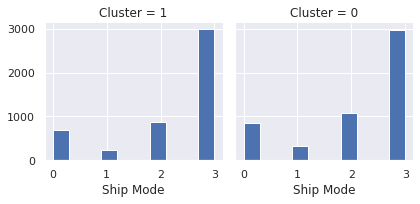

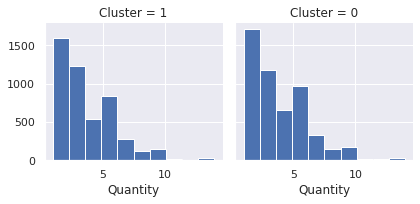

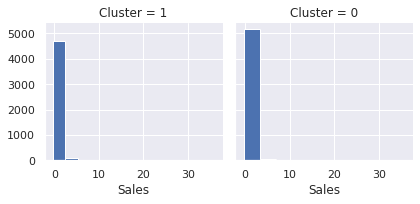

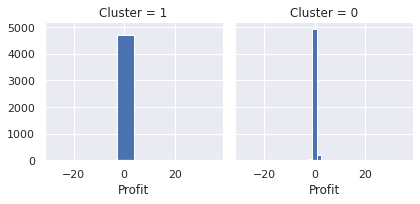

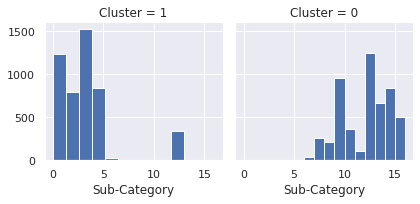

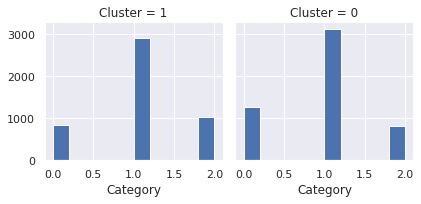

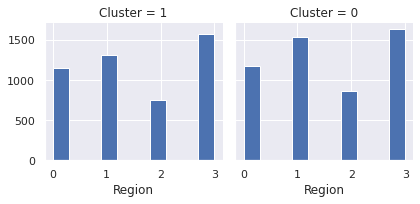

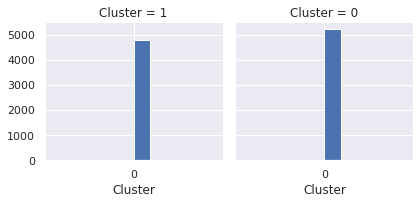

In [ ]:
# TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(df_std)
labels_kmean=kmean(tsne,2)
df_std['Cluster'] = labels_kmean.astype(str)

for c in df_std:
  grid = sns.FacetGrid(df_std, col="Cluster")
  grid.map(plt.hist,c)

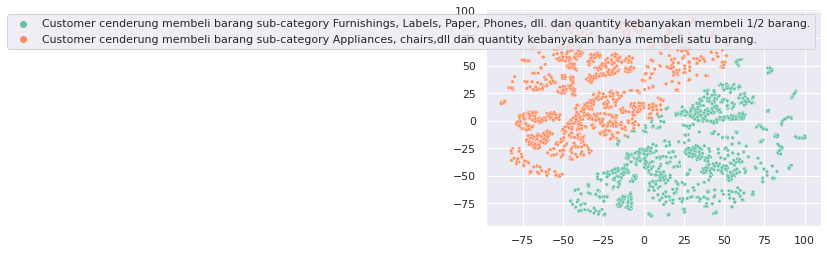

In [ ]:
# Cluster Graph of K-Means Standard Scaler
cl = []

for row in df_std['Cluster']:
  if row == "0":cl.append("Customer cenderung membeli barang sub-category Appliances, chairs,dll dan quantity kebanyakan hanya membeli satu barang.")
  elif row == "1":cl.append("Customer cenderung membeli barang sub-category Furnishings, Labels, Paper, Phones, dll. dan quantity kebanyakan membeli 1/2 barang.")

sns.scatterplot(tsne[:,0], tsne[:,1], hue=cl, s=10, palette="Set2")
plt.show()

In [ ]:
df['Sub-Category']

Order ID
CA-2016-152156      Bookcases
CA-2016-152156         Chairs
CA-2016-138688         Labels
US-2015-108966         Tables
US-2015-108966        Storage
                     ...     
CA-2014-110422    Furnishings
CA-2017-121258    Furnishings
CA-2017-121258         Phones
CA-2017-121258          Paper
CA-2017-119914     Appliances
Name: Sub-Category, Length: 9994, dtype: object

In [ ]:
df_imp['Sub-Category']

Order ID
CA-2016-152156     4
CA-2016-152156     5
CA-2016-138688    10
US-2015-108966    16
US-2015-108966    14
                  ..
CA-2014-110422     9
CA-2017-121258     9
CA-2017-121258    13
CA-2017-121258    12
CA-2017-119914     1
Name: Sub-Category, Length: 9994, dtype: int64

**Tambahkan Vesi MinMax Scaler & Robust Scaler**
**Hanya ambil Algoritma yang memiliki score terbaik untuk di visualisasikan dan diberi label**

**MinMax**

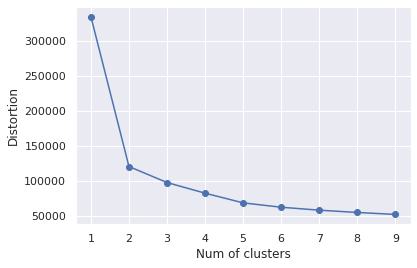

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

min_max = MinMaxScaler()


# Dataframe utk standard scaler
df_mm = df_imp.copy()
df_mm[['Sales','Profit']] = min_max.fit_transform(df_mm[['Sales','Profit']])

# Elbow Method
k = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, max_iter = 100)
  kmeans.fit(df_mm[['Ship Mode','Quantity','Sales','Profit','Sub-Category','Category','Region']])
  k.append(kmeans.inertia_)

plt.plot(range(1,10),k, marker='o')
plt.xlabel("Num of clusters")
plt.ylabel("Distortion")
plt.show()

In [ ]:
df_mm_pred = pd.DataFrame(kmean(df_mm,2), index=df_mm.index,columns=['Cluster1'])
df_mm_pred

,Cluster1
Order ID,
CA-2016-152156,1
CA-2016-152156,1
CA-2016-138688,0
US-2015-108966,0
US-2015-108966,0
...,...
CA-2014-110422,0
CA-2017-121258,0
CA-2017-121258,0


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

def cluster_hierarchical(df,k):
  cluster_hierarchical = AgglomerativeClustering(n_clusters=k,affinity='euclidean')
  cluster_hierarchical.fit_predict(df)
  labels_cluster_hierarchical = cluster_hierarchical.labels_
  return labels_cluster_hierarchical

In [ ]:
labels_kmean = kmean(df_mm,2)
labels_cluster_hierarchical = cluster_hierarchical(df_mm,2)

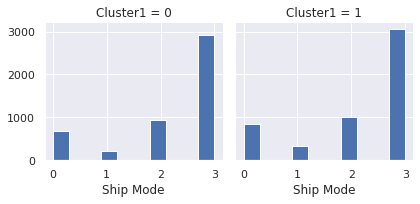

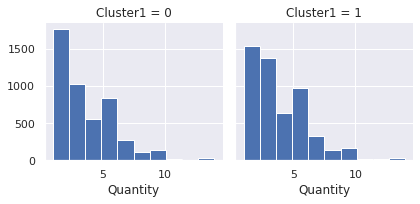

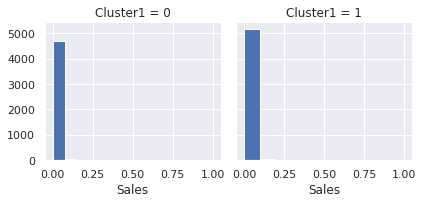

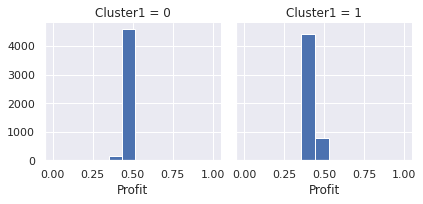

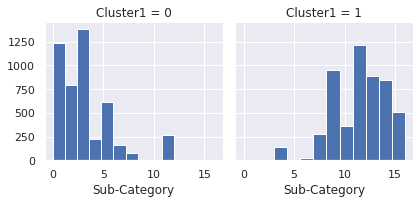

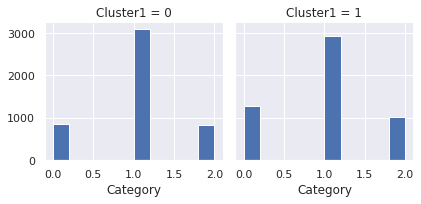

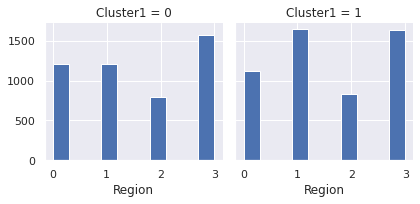

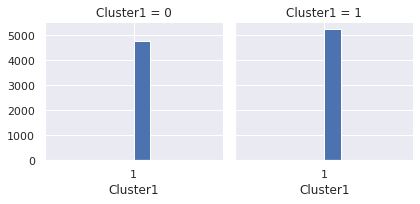

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(df_mm)
labels_kmean=kmean(tsne,2)
df_mm['Cluster1'] = labels_kmean.astype(str)

for c in df_mm:
  grid = sns.FacetGrid(df_mm, col="Cluster1")
  grid.map(plt.hist,c)

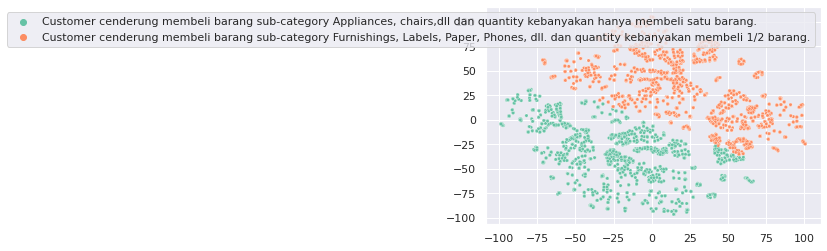

In [ ]:
# Cluster Graph of K-Means MinMax
cl = []

for row in df_mm['Cluster1']:
  if row == "0":cl.append("Customer cenderung membeli barang sub-category Appliances, chairs,dll dan quantity kebanyakan hanya membeli satu barang.")
  elif row == "1":cl.append("Customer cenderung membeli barang sub-category Furnishings, Labels, Paper, Phones, dll. dan quantity kebanyakan membeli 1/2 barang.")

sns.scatterplot(tsne[:,0], tsne[:,1], hue=cl, s=10, palette="Set2")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

def cluster_hierarchical(df,k):
  cluster_hierarchical = AgglomerativeClustering(n_clusters=k,affinity='euclidean')
  cluster_hierarchical.fit_predict(df)
  labels_cluster_hierarchical = cluster_hierarchical.labels_
  return labels_cluster_hierarchical

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print("Silhouette score of K-Means: ", silhouette_score(df_mm, labels_kmean), '\n')
print("Silhouette score of Agglo Hierarchical: ", silhouette_score(df_mm, labels_cluster_hierarchical), '\n\n')

print("Davies Bouldin score of K-Means: ", davies_bouldin_score(df_mm, labels_kmean), '\n')
print("Davies Bouldin of Agglo Hierarchical: ", davies_bouldin_score(df_mm, labels_cluster_hierarchical), '\n')

Silhouette score of K-Means:  0.45030336150658884 

Silhouette score of Agglo Hierarchical:  0.5304748386120529 


Davies Bouldin score of K-Means:  0.8321980504584814 

Davies Bouldin of Agglo Hierarchical:  0.6948015431096548 



**RobustScaler**

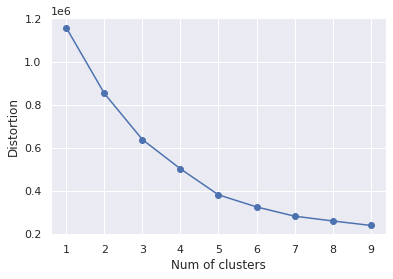

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

RS = RobustScaler()

# Dataframe utk standard Robustscaler
df_rs = df_imp.copy()
df_rs[['Sales','Profit']] = RS.fit_transform(df_std[['Sales','Profit']])

# Elbow Method
k = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, max_iter = 100)
  kmeans.fit(df_rs[['Ship Mode','Quantity','Sales','Profit','Sub-Category','Category','Region']])
  k.append(kmeans.inertia_)

plt.plot(range(1,10),k, marker='o')
plt.xlabel("Num of clusters")
plt.ylabel("Distortion")
plt.show()

In [ ]:
df_rs_pred = pd.DataFrame(kmean(df_rs,2), index=df_mm.index,columns=['Cluster2'])
df_rs_pred

,Cluster2
Order ID,
CA-2016-152156,0
CA-2016-152156,0
CA-2016-138688,0
US-2015-108966,0
US-2015-108966,0
...,...
CA-2014-110422,0
CA-2017-121258,0
CA-2017-121258,0


In [ ]:
labels_kmean = kmean(df_rs,2)
labels_cluster_hierarchical = cluster_hierarchical(df_rs,2)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

def cluster_hierarchical(df,k):
  cluster_hierarchical = AgglomerativeClustering(n_clusters=k,affinity='euclidean')
  cluster_hierarchical.fit_predict(df)
  labels_cluster_hierarchical = cluster_hierarchical.labels_
  return labels_cluster_hierarchical

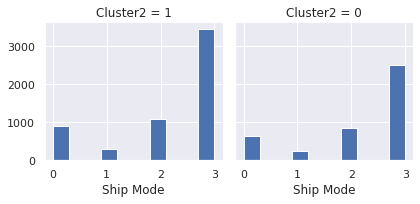

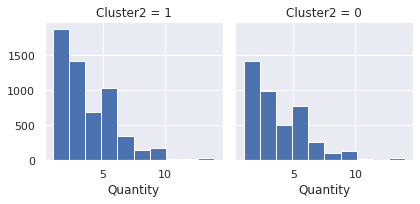

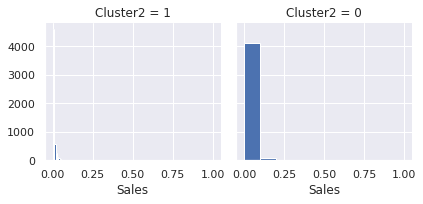

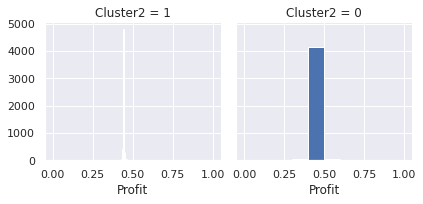

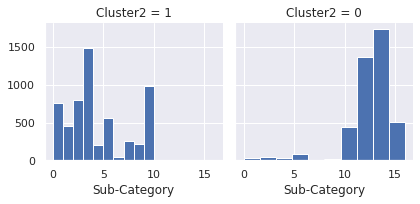

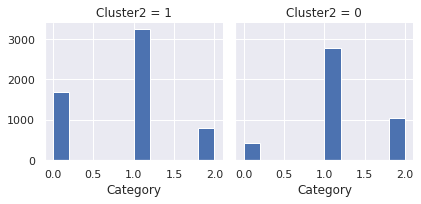

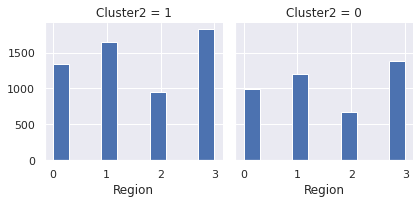

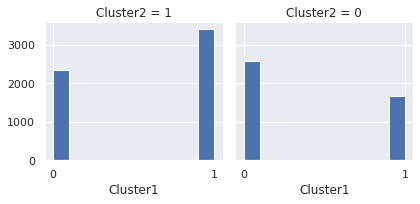

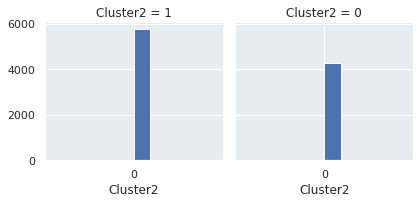

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(df_rs)
labels_kmean=kmean(tsne,2)
df_mm['Cluster2'] = labels_kmean.astype(str)

for c in df_mm:
  grid = sns.FacetGrid(df_mm, col="Cluster2")
  grid.map(plt.hist,c)

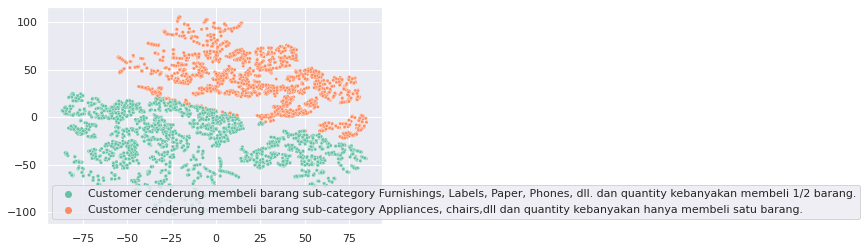

In [ ]:
# Cluster Graph of K-Means MinMax
cl = []

for row in df_mm['Cluster2']:
  if row == "0":cl.append("Customer cenderung membeli barang sub-category Appliances, chairs,dll dan quantity kebanyakan hanya membeli satu barang.")
  elif row == "1":cl.append("Customer cenderung membeli barang sub-category Furnishings, Labels, Paper, Phones, dll. dan quantity kebanyakan membeli 1/2 barang.")

sns.scatterplot(tsne[:,0], tsne[:,1], hue=cl, s=10, palette="Set2")
plt.show()